In [22]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3d

## Gaussian Distribution

In [17]:
def get_ndim_corr(ranges):
    return np.concatenate([pos for pos in zip([m.reshape(-1) for m in np.meshgrid(*ranges)])]).transpose()

def sample_from_gaussian(n_samples, mu=0, sigma=1):
    mu = np.array(mu)
    sigma = np.array(sigma)
    assert len(mu.shape) <= 1
    if len(mu.shape) == 0:
        assert len(sigma.shape) == 0
        return np.random.normal(mu, sigma, n_samples)
    else:
        assert len(sigma.shape) == 2 or len(sigma.shape) == 1
        if len(sigma.shape) == 1:
             sigma = np.diag(sigma)
        return np.random.multivariate_normal(mu, sigma, n_samples)
    
def gaussian_pdf(n_dot, mu=0, sigma=1):
    mu = np.array(mu)
    sigma = np.array(sigma)
    assert len(mu.shape) <= 1
    if len(mu.shape) == 0:
        assert len(sigma.shape) == 0
        x = np.linspace(mu-sigma*3, mu+sigma*3, n_dot)
        return x, 1.0/(2/np.pi)**0.5/sigma*np.exp(-0.5*((x-mu)/sigma)**2)
    else:
        assert len(sigma.shape) == 2 or len(sigma.shape) == 1
        if len(sigma.shape) == 1:
            sigma = np.diag(sigma)
        ranges = np.linspace(mu-np.diagonal(sigma)*3, mu+np.diagonal(sigma)*3, n_dot).transpose()
        x = get_ndim_corr(ranges)
        return x, 1.0/(2/np.pi)**(0.5*mu.shape[0])/np.linalg.det(sigma)**0.5\
    *np.exp(-0.5*np.sum(np.matmul((x-mu[np.newaxis,:]),np.linalg.inv(sigma))\
                        *(x--mu[np.newaxis,:]),axis=1))
        
# def gaussian_curve(n_dot, mu=0, sigma=1):
#     x = np.linspace(mu-3*sigma, mu+3*sigma, n_dot)
#     p = s

### 高斯分布

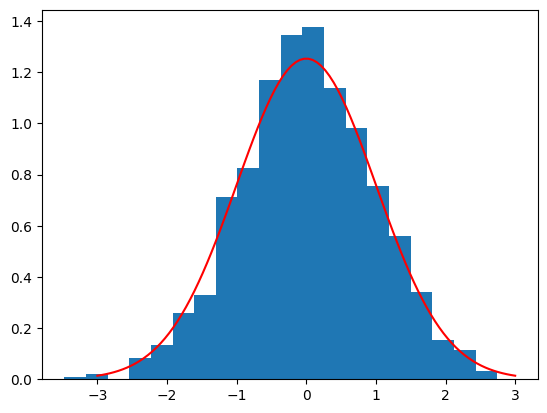

In [33]:
# 参数
n_sample = 1000
n_dot = 100
params = {
    "mu": 0,
    "sigma": 1
}
# sample
samples = sample_from_gaussian(n_sample, **params)
hist, bin_edges = np.histogram(samples, bins=20)
# pdf
x, p = gaussian_pdf(n_dot, **params)
# plot2d
plt.bar((bin_edges[1:]+bin_edges[:-1])/2, hist/(bin_edges[1]-bin_edges[0])**2/hist.sum(),width=bin_edges[1]-bin_edges[0])
plt.plot(x, p, color="r")
plt.show()

### 多元高斯分布

F:\Users\20163\anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app
F:\Users\20163\anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


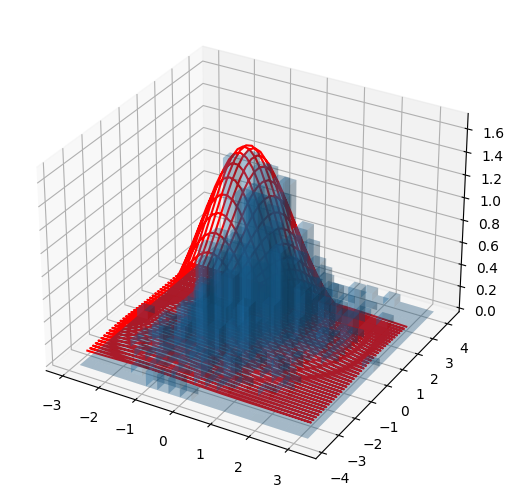

In [90]:
# 参数
n_sample = 1000
n_dot = 40
params = {
    "mu": [0, 0],
    "sigma": [[1, 0.5],[0.3,1]]
}
# sample
samples = sample_from_gaussian(n_sample, **params)
H, xedges, yedges = np.histogram2d(samples[:,0],samples[:,1],bins=20)
pos = get_ndim_corr([(xedges[1:]+xedges[:-1])/2, (yedges[1:]+yedges[:-1])/2])
xedges, yedges = pos[:,0], pos[:,1]
H = H.reshape(-1)
# pdf
x, p = gaussian_pdf(n_dot, **params)
# plot3d
fig = plt.figure()
ax = p3d.Axes3D(fig)
ax.bar3d(xedges, yedges, 0, (xedges[1:]-xedges[:-1]).max(), (yedges[1:]-yedges[:-1]).max(), H/(xedges[1:]-xedges[:-1]).max()**2/(yedges[1:]-yedges[:-1]).max()**2/H.sum(), zorder=2, alpha=0.2)
ax.plot3D(x[:,0],x[:,1],p,color="r", zorder=1, )
plt.show()

### 混合高斯分布

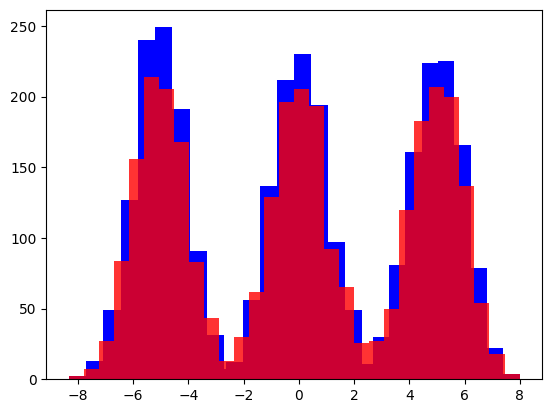

In [103]:
# 参数
n_sample = 1000
n_dot = 100
params = [
    {"mu": 0,
    "sigma": 1},
    {"mu": 5,
    "sigma": 1},
    {"mu": -5,
    "sigma": 1}
]
weight = [0.2, 0.4, 0.4]
# sample
samples = [sample_from_gaussian(n_sample, **param) for param in params]
for sample in samples:
    hist, bin_edges = np.histogram(sample, bins=10)
    plt.bar((bin_edges[1:]+bin_edges[:-1])/2, hist,width=bin_edges[1]-bin_edges[0], color="b")
# plot2d
hist, bin_edges = np.histogram(np.concatenate(samples), bins=30)
plt.bar((bin_edges[1:]+bin_edges[:-1])/2, hist,width=bin_edges[1]-bin_edges[0], color="r", alpha=0.8)
# plt.plot(x, p, color="r")
plt.show()